In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

StatementMeta(project01Spark, 13, 7, Finished, Available)

#### **Data Load**

In [41]:
%%pyspark
df = spark.read.load('abfss://container03@dls01project.dfs.core.windows.net/insurance_data/insurance.csv', format='csv', header=True)
## If header exists uncomment line below 
display(df.limit(10))

StatementMeta(project01Spark, 13, 8, Finished, Available)

SynapseWidget(Synapse.DataFrame, 399e5d6c-131b-4333-9b4d-7fe73aba8ad0)

In [42]:
%%pyspark
df = spark.read.load('abfss://container03@dls01project.dfs.core.windows.net/insurance_data/insurance.csv', format='csv', header=True)
## If header exists uncomment line below

df.write.mode("overwrite").saveAsTable("default.InsuranceSpark")

StatementMeta(project01Spark, 13, 9, Finished, Available)

In [43]:
df_pd = df.toPandas()
df_pd

StatementMeta(project01Spark, 13, 10, Finished, Available)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,None,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,None,male,33.7,80,No,0,No,northwest,1136.4
4,4,5,None,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.4
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.4
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


#### **Data Cleaning**

In [44]:
df_pd.info()

StatementMeta(project01Spark, 13, 11, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          1340 non-null   object
 1   PatientID      1340 non-null   object
 2   age            1335 non-null   object
 3   gender         1340 non-null   object
 4   bmi            1340 non-null   object
 5   bloodpressure  1340 non-null   object
 6   diabetic       1340 non-null   object
 7   children       1340 non-null   object
 8   smoker         1340 non-null   object
 9   region         1337 non-null   object
 10  claim          1340 non-null   object
dtypes: object(11)
memory usage: 115.3+ KB


In [45]:
df_pd.isnull().sum()

StatementMeta(project01Spark, 13, 12, Finished, Available)

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [46]:
df_pd = df_pd.drop(columns='index',axis=1)
df_pd

StatementMeta(project01Spark, 13, 13, Finished, Available)

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,None,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,None,male,33.7,80,No,0,No,northwest,1136.4
4,5,None,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.4
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.4
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [47]:
df_pd.dropna(inplace=True)
df_pd

StatementMeta(project01Spark, 13, 14, Finished, Available)

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,8,19.0,male,41.1,100,No,0,No,northwest,1146.8
8,9,20.0,male,43.0,86,No,0,No,northwest,1149.4
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.4
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.4
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [48]:
df_pd.duplicated().sum()

StatementMeta(project01Spark, 13, 15, Finished, Available)

0

In [49]:
df_pd = df_pd.set_index('PatientID')
df_pd
# print(df_pd.set_index('PatientID'))

StatementMeta(project01Spark, 13, 16, Finished, Available)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
PatientID,,,,,,,,,
1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
2,24.0,male,30.1,87,No,0,No,southeast,1131.51
8,19.0,male,41.1,100,No,0,No,northwest,1146.8
9,20.0,male,43.0,86,No,0,No,northwest,1149.4
10,30.0,male,53.1,97,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...
1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.4
1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.4


In [50]:
df_pd[['age','children']] = df_pd[['age','children']].astype(float).astype(int)
df_pd[['bmi','bloodpressure','claim']] = df_pd[['bmi','bloodpressure','claim']].astype(float)
df_pd

StatementMeta(project01Spark, 13, 17, Finished, Available)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
PatientID,,,,,,,,,
1,39,male,23.2,91.0,Yes,0,No,southeast,1121.87
2,24,male,30.1,87.0,No,0,No,southeast,1131.51
8,19,male,41.1,100.0,No,0,No,northwest,1146.80
9,20,male,43.0,86.0,No,0,No,northwest,1149.40
10,30,male,53.1,97.0,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...
1336,44,female,35.5,88.0,Yes,0,Yes,northwest,55135.40
1337,59,female,38.1,120.0,No,1,Yes,northeast,58571.07
1338,30,male,34.5,91.0,Yes,3,Yes,northwest,60021.40


In [51]:
df_pd.info()

StatementMeta(project01Spark, 13, 18, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 1 to 1340
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1332 non-null   int64  
 1   gender         1332 non-null   object 
 2   bmi            1332 non-null   float64
 3   bloodpressure  1332 non-null   float64
 4   diabetic       1332 non-null   object 
 5   children       1332 non-null   int64  
 6   smoker         1332 non-null   object 
 7   region         1332 non-null   object 
 8   claim          1332 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 104.1+ KB


In [52]:
df_pd.head(5)

StatementMeta(project01Spark, 13, 19, Finished, Available)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
PatientID,,,,,,,,,
1,39,male,23.2,91.0,Yes,0,No,southeast,1121.87
2,24,male,30.1,87.0,No,0,No,southeast,1131.51
8,19,male,41.1,100.0,No,0,No,northwest,1146.80
9,20,male,43.0,86.0,No,0,No,northwest,1149.40
10,30,male,53.1,97.0,No,0,No,northwest,1163.46


In [53]:
mx_age=df_pd['age'].max()
mn_age=df_pd['age'].min()
print(mx_age, mn_age)

StatementMeta(project01Spark, 13, 20, Finished, Available)

60 18


In [54]:
age_range = [18,25,41,57,60]
age_labels = ['Gen Z','Millennials', 'Gen X', 'Baby Boomers']
df_pd['age_group'] =  pd.cut(df_pd['age'], age_range,labels=age_labels)
# ageGroup = df_pd[['age_group', 'claim']].groupby('age_group').mean().sort_values(by="claim", ascending=True)


StatementMeta(project01Spark, 13, 21, Finished, Available)

In [55]:
mx_bmi=df_pd['bmi'].max()
mn_bmi=df_pd['bmi'].min()
print(mn_bmi, mx_bmi)

StatementMeta(project01Spark, 13, 22, Finished, Available)

16.0 53.1


In [56]:
bmi_range = [15.5,18.5,24.9,29.9,60]
bmi_labels = ['Underweight','Healthy Weight', 'Overweight', 'Obese']
df_pd['bmi_group'] = pd.cut(df_pd['bmi'], bmi_range, labels=bmi_labels)

StatementMeta(project01Spark, 13, 23, Finished, Available)

In [57]:
df_pd[['bmi_group','bmi']]

StatementMeta(project01Spark, 13, 24, Finished, Available)

,bmi_group,bmi
PatientID,,
1,Healthy Weight,23.2
2,Obese,30.1
8,Obese,41.1
9,Obese,43.0
10,Obese,53.1
...,...,...
1336,Obese,35.5
1337,Obese,38.1
1338,Obese,34.5


In [58]:
df_pd['bmi_group'].value_counts()

StatementMeta(project01Spark, 13, 25, Finished, Available)

Obese             702
Overweight        387
Healthy Weight    222
Underweight        21
Name: bmi_group, dtype: int64

In [59]:
bloodpressure_range = [71,120,129,139,148]
bloodpressure_labels = ['Normal', 'Elevated', 'Hypertension Stage 1','Hypertension Stage 2']
df_pd['bloodpressure_group'] = pd.cut(df_pd['bloodpressure'], bloodpressure_range, labels = bloodpressure_labels)

StatementMeta(project01Spark, 13, 26, Finished, Available)

In [60]:
df_pd  = df_pd[['gender','age','age_group', 'bmi','bmi_group', 'bloodpressure', 'bloodpressure_group','diabetic', 'children',
       'smoker', 'region', 'claim' ]]

df_pd

StatementMeta(project01Spark, 13, 27, Finished, Available)

,gender,age,age_group,bmi,bmi_group,bloodpressure,bloodpressure_group,diabetic,children,smoker,region,claim
PatientID,,,,,,,,,,,,
1,male,39,Millennials,23.2,Healthy Weight,91.0,Normal,Yes,0,No,southeast,1121.87
2,male,24,Gen Z,30.1,Obese,87.0,Normal,No,0,No,southeast,1131.51
8,male,19,Gen Z,41.1,Obese,100.0,Normal,No,0,No,northwest,1146.80
9,male,20,Gen Z,43.0,Obese,86.0,Normal,No,0,No,northwest,1149.40
10,male,30,Millennials,53.1,Obese,97.0,Normal,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...,...,...,...
1336,female,44,Gen X,35.5,Obese,88.0,Normal,Yes,0,Yes,northwest,55135.40
1337,female,59,Baby Boomers,38.1,Obese,120.0,Normal,No,1,Yes,northeast,58571.07
1338,male,30,Millennials,34.5,Obese,91.0,Normal,Yes,3,Yes,northwest,60021.40


### **Visualization**

##### **Claims by Region**

StatementMeta(project01Spark, 13, 28, Finished, Available)

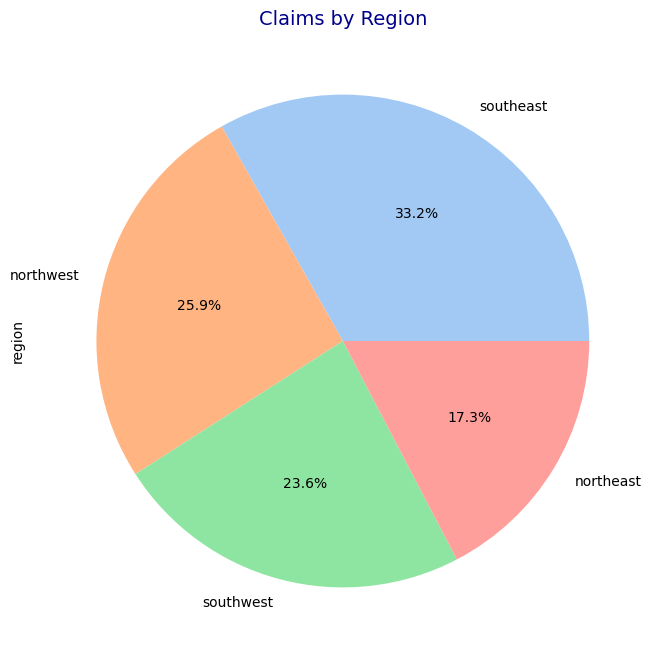

In [61]:
plt.figure(figsize = (12,8))
sns.set_palette('pastel')
plt.title("Claims by Region" ,color = 'DarkBlue',fontsize=14)
df_pd['region'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()



##### Patients in the Southeast with the 33.2% and Northwest with 25.9% received the highest number of health insurance claims.

##### **Claims per Age Group**

StatementMeta(project01Spark, 13, 29, Finished, Available)

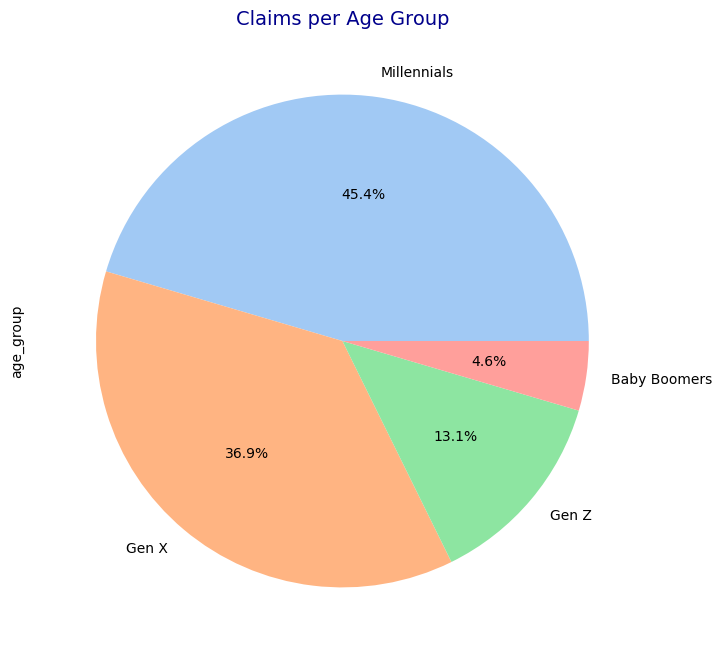

In [62]:

plt.figure(figsize = (12,8))
sns.set_palette('pastel')
plt.title("Claims per Age Group" ,color = 'DarkBlue',fontsize=14)
df_pd['age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

##### Millennials are the 45.4% of the total and received the most health insurance claims.

##### **BMI Ranges**

StatementMeta(project01Spark, 13, 30, Finished, Available)

Text(0.5, 1.0, 'BMI Range')

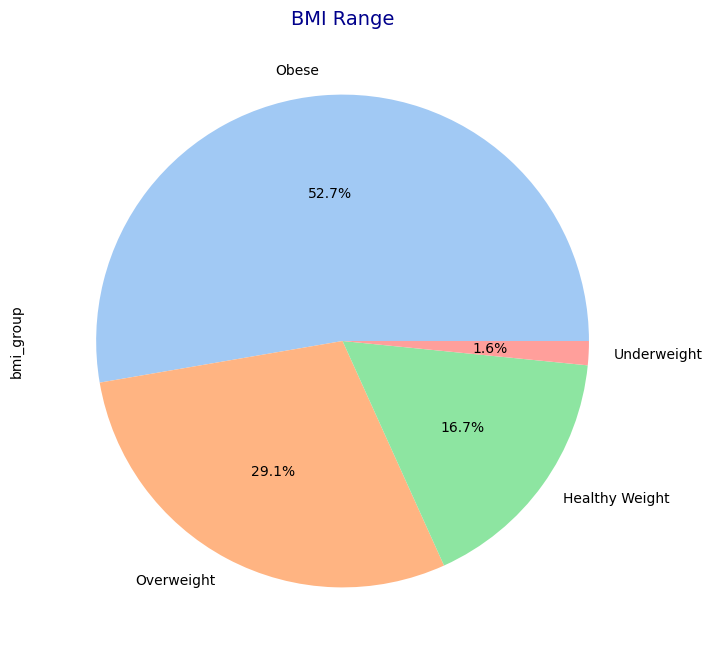

In [63]:
# plt.pie(df_pd['bmi_group'].value_counts(), autopct='%1.1f%%')


plt.figure(figsize = (12,8))
df_pd['bmi_group'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('BMI Range',color = 'DarkBlue',fontsize=14)

StatementMeta(project01Spark, 13, 31, Finished, Available)

<AxesSubplot: title={'center': 'BMI and Claim Amount'}, xlabel='BMI', ylabel='Claim'>

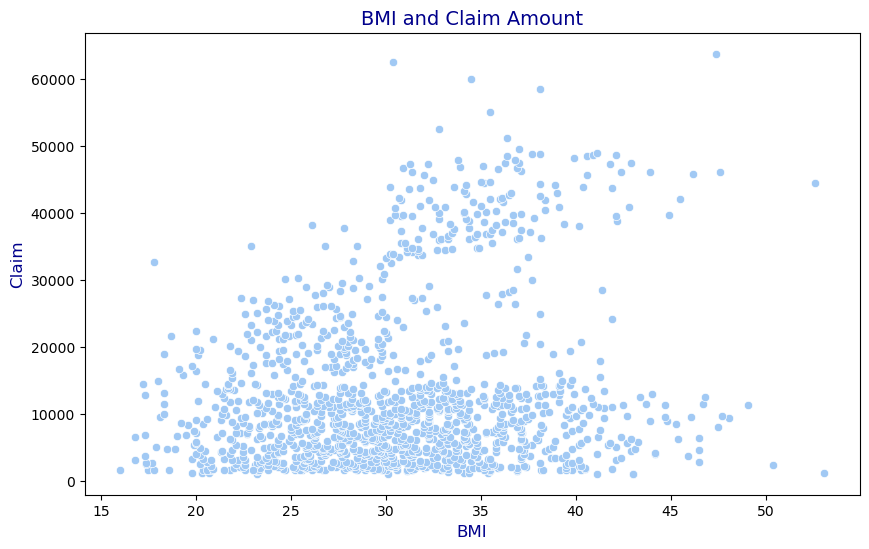

In [64]:
plt.figure(figsize=(10,6))
plt.title("BMI and Claim Amount",fontsize=14, color='DarkBlue')
plt.xlabel('BMI',fontsize=12,color='DarkBlue')
plt.ylabel('Claim',fontsize=12,color='DarkBlue')
sns.scatterplot(x=df_pd['bmi'], y=df_pd['claim'])

StatementMeta(project01Spark, 13, 32, Finished, Available)

Text(0, 0.5, 'Claim Amounts')

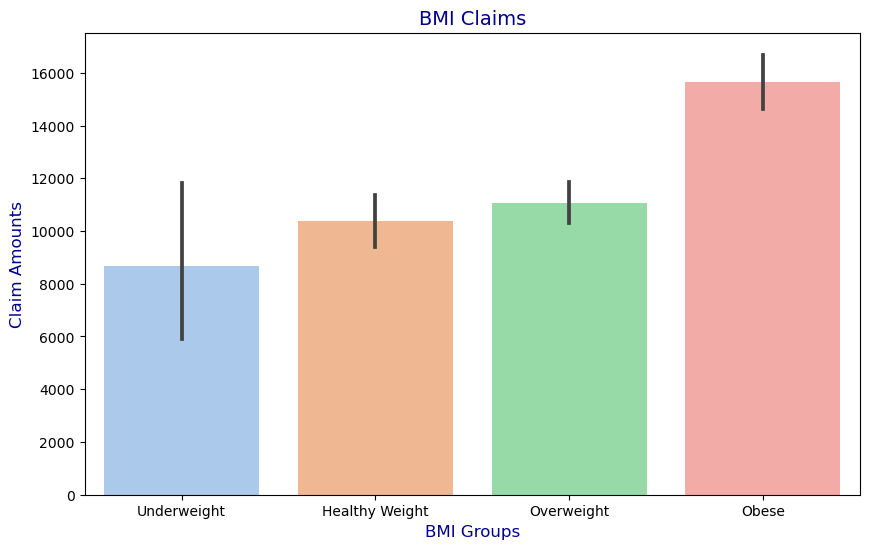

In [65]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))
plt.title("BMI Claims",fontsize=14, color='DarkBlue')
sns.barplot(x=df_pd.bmi_group, y=df_pd['claim'])
plt.xlabel('BMI Groups',fontsize=12,color='DarkBlue')
plt.ylabel('Claim Amounts',fontsize=12,color='DarkBlue')

##### The majority of patients receiving health insurance claims are obese with the 52.7%. The cost of the claims for patients obese  ranges broadly from less than 12,000 to above 60,000.

##### **Gender by Region**

StatementMeta(project01Spark, 13, 33, Finished, Available)

Text(0.5, 0, 'Gender')

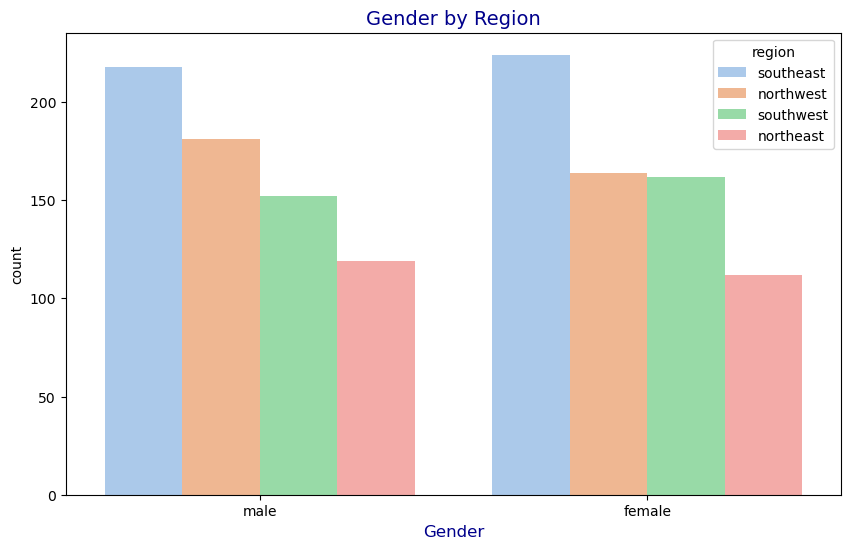

In [66]:
plt.figure(figsize = (10,6))
plt.title("Gender by Region", fontsize=14, color='DarkBlue')
sns.countplot(x = 'gender', hue = 'region', data = df_pd)
plt.xlabel('Gender',fontsize=12,color='DarkBlue')
# plt.ylabel('Total',fontsize=12,color='DarkBlue')

##### In the Southeast region, females filed slightly more claims than males. There is a substantial disparity in the number of claims between the Southeast and Northeast regions.

#### **Correlations**

StatementMeta(project01Spark, 13, 34, Finished, Available)

Text(0.5, 0, 'Age Group')

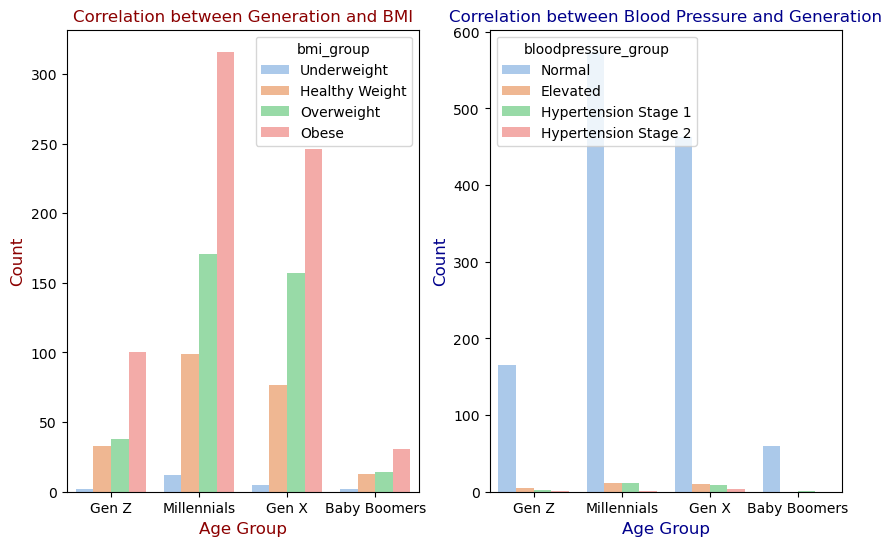

In [67]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
plt.title("Correlation between Generation and BMI", color = 'DarkRed')
sns.countplot(x ='age_group', hue = 'bmi_group', data = df_pd)
plt.ylabel('Count',fontsize=12,color='DarkRed')
plt.xlabel('Age Group',fontsize=12,color='DarkRed')

plt.subplot(1,2,2)
plt.title("Correlation between Blood Pressure and Generation", color = 'DarkBlue')
sns.countplot(x = 'age_group', hue = 'bloodpressure_group', data = df_pd)
plt.ylabel('Count',fontsize=12,color='DarkBlue')
plt.xlabel('Age Group',fontsize=12,color='DarkBlue')

# plt.xlabel('Count',fontsize=12,color='DarkRed')
# plt.ylabel('Age Group',fontsize=12,color='DarkRed')

According to USC Libraries, the following list of years are ascribed to generational age groups: Gen Z 1995 - 2010, Millennials 1977-1995, Gen X 1965-1976 and Baby Boomers 1946-1964.

Heart.org lists the systolic mm Hg, (upper number) blood pressure ranges less than 120 as normal, 120-129 elevated, 130 -139 High Blood Pressure (Hypertension) Stage 1, 140 or higher High Blood Pressure (Hypertension) Stage 2, higher than 180 Hypertensive crisis. The data set did not include any patients that experienced a hypertensive crisis.

There are significantly more obese patients that are millennials than any other age group. The majority of millennials have normal blood pressure ranges. However, millennials have more elevated blood pressure and hypertension stage 1 blood pressure ranges than any other age group.

StatementMeta(project01Spark, 13, 35, Finished, Available)

Text(0.5, 0, 'Age Group')

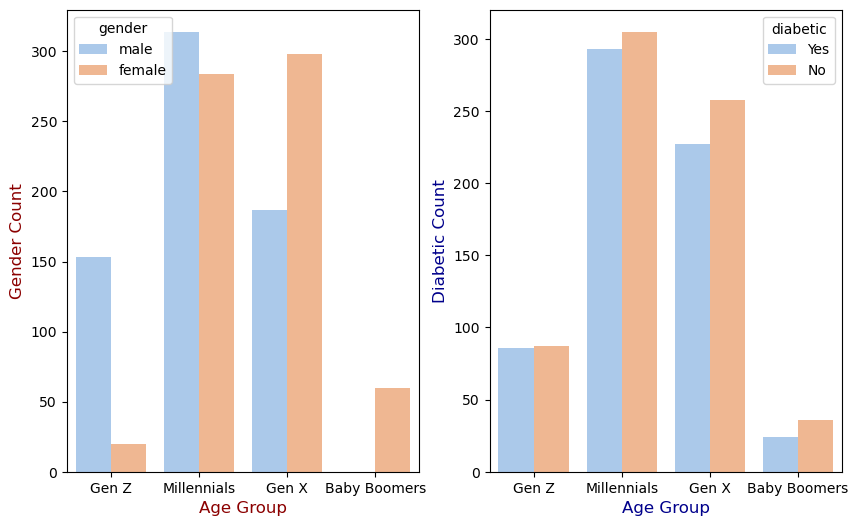

In [68]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.countplot(x = 'age_group', hue = 'gender', data = df_pd)
plt.ylabel('Gender Count',fontsize=12,color='DarkRed')
plt.xlabel('Age Group',fontsize=12,color='DarkRed')

plt.subplot(1,2,2)
sns.countplot(x ='age_group', hue = 'diabetic', data = df_pd)
plt.ylabel('Diabetic Count',fontsize=12,color='DarkBlue')
plt.xlabel('Age Group',fontsize=12,color='DarkBlue')



Millennial males and females received a higher proportion of claims than any other age group. While a significant number of claim recipients are diabetic, there is a very small variance between diabetic and non-diabetic across all age groups.

StatementMeta(project01Spark, 13, 36, Finished, Available)

Text(0.5, 0, 'Age Group')

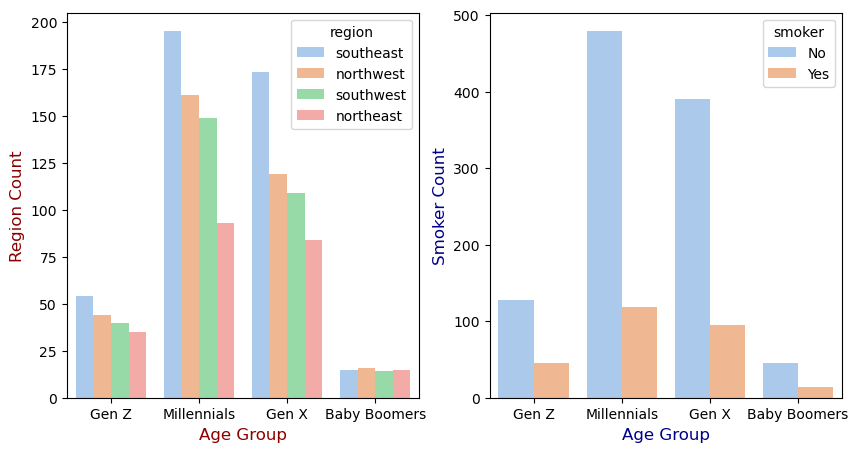

In [69]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'age_group', hue = 'region', data = df_pd)
plt.ylabel('Region Count',fontsize=12,color='DarkRed')
plt.xlabel('Age Group',fontsize=12,color='DarkRed')

plt.subplot(1,2,2)
sns.countplot( x = 'age_group', hue = 'smoker', data = df_pd)
plt.ylabel('Smoker Count',fontsize=12,color='DarkBlue')
plt.xlabel('Age Group',fontsize=12,color='DarkBlue')


Throughout the United States, millennials received the majority of health insurance claims. The majority of claim recipients were non-smokers.

StatementMeta(project01Spark, 13, 37, Finished, Available)

Text(0.5, 0, 'Age Group')

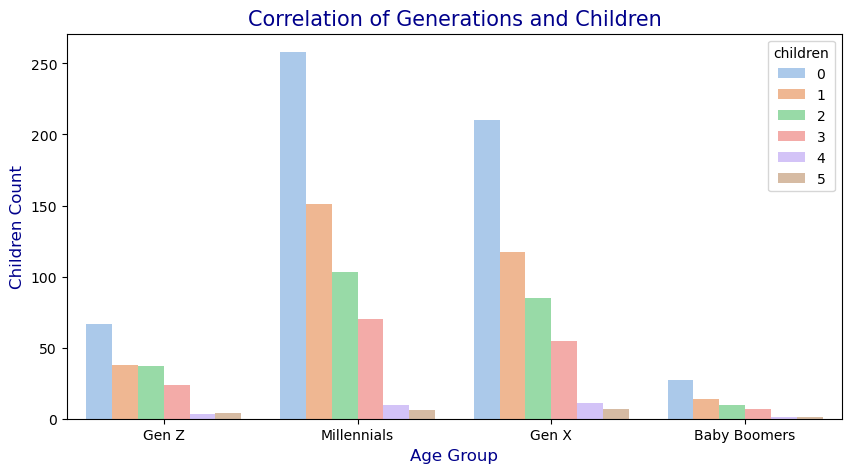

In [70]:
# plt.subplot(#Total number of rows, total number of columns, plot number)
plt.figure(figsize = (10,5))

# Add title 
plt.title("Correlation of Generations and Children", fontsize=15, color='DarkBlue')

# Bar chart showing correlation between age groups and generations
sns.countplot( x = 'age_group', hue = 'children', data = df_pd)


plt.ylabel('Children Count',fontsize=12,color='DarkBlue')
plt.xlabel('Age Group',fontsize=12,color='DarkBlue')


Millenials are parents to the highest number of childern under the age of 18 years old.

StatementMeta(project01Spark, 13, 41, Finished, Available)

Text(0.5, 0, 'Region')

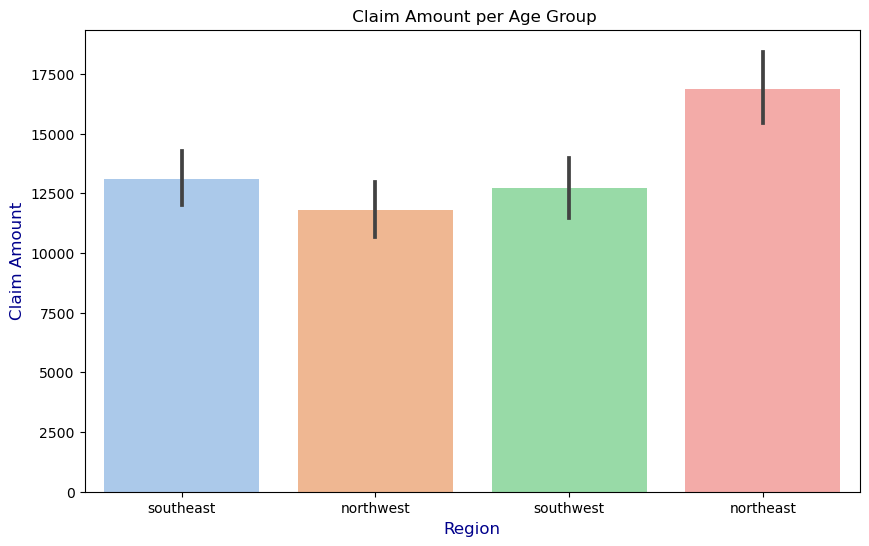

In [74]:
plt.figure(figsize=(10,6))

# Add title
plt.title(" Claim Amount per Age Group")
sns.barplot(x=df_pd.region, y=df_pd['claim'])

plt.ylabel('Claim Amount',fontsize=12,color='DarkBlue')
plt.xlabel('Region',fontsize=12,color='DarkBlue')

The average claim amount is highest in the Northeast.

StatementMeta(project01Spark, 13, 43, Finished, Available)

Text(0.5, 0, 'BloodPressure')

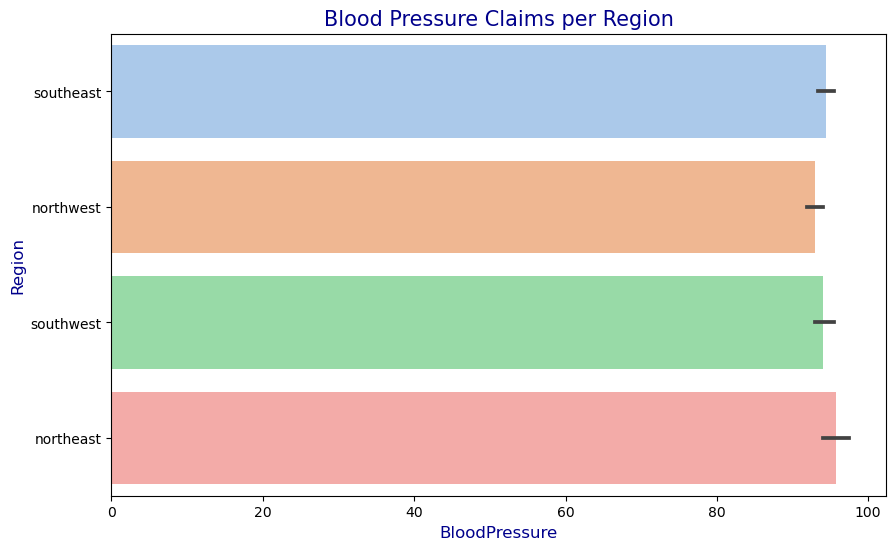

In [76]:
plt.figure(figsize=(10,6))

# Add title
plt.title("Blood Pressure Claims per Region",fontsize=15, color='DarkBlue')

# Bar chart showing blood pressure claims by region
sns.barplot(x=df_pd.bloodpressure, y=df_pd['region'])

plt.ylabel('Region',fontsize=12,color='DarkBlue')
plt.xlabel('BloodPressure',fontsize=12,color='DarkBlue')

Patients in the Southeast and Northeast have the highest blood pressure. However, blood pressure less than 120 is classified as normal.

**Problems**
Patients in the Southeast experience significantly higher claim rates compared to other regions. Most of these claims are from millennials. Obesity is a common factor among claim recipients. This is concerning because millennials are the primary parents of children under 18. If this trend persists, future generations may face obesity-related health issues and increased medical expenses.

**Solutions**
The CDC recommends 40 to 50 hours of annual nutritional education to promote positive behavior change. However, U.S. students currently receive less than 8 hours of nutritional education per year. School administrators and teachers play a crucial role in shaping the future. Opportunities to teach healthy lifestyles exist across all grades, including integrating math with counting fruits and vegetables, establishing school gardens, and introducing appealing nutritious food options in cafeterias. These efforts can help children learn to eat for sustenance rather than indulgence.

**Next Steps**
State and local government officials should collaborate with school administrators to ensure that schools have the necessary resources for teaching healthy eating habits. Teachers should involve their students when designing lessons focused on healthy lifestyles. Additionally, some activities and events can be structured to involve the entire family. These actions will set millennials and their children on a path toward better health outcomes.